In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/train.csv')
df["datetime"] = pd.to_datetime(df["id"], format="%Y-%m-%d %H")
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,datetime
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01 00:00:00
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01 01:00:00
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01 02:00:00
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01 03:00:00
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01 04:00:00


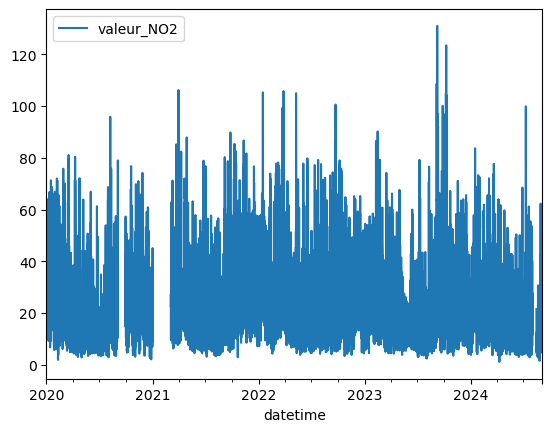

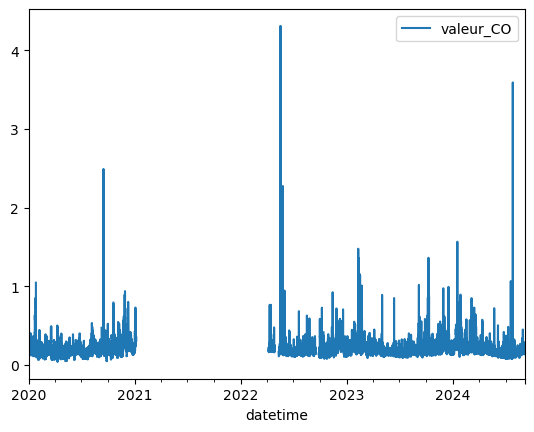

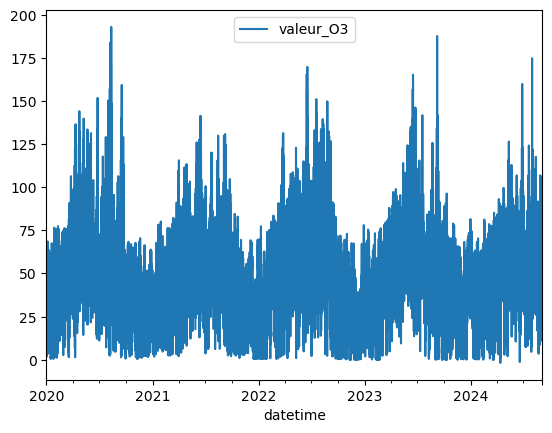

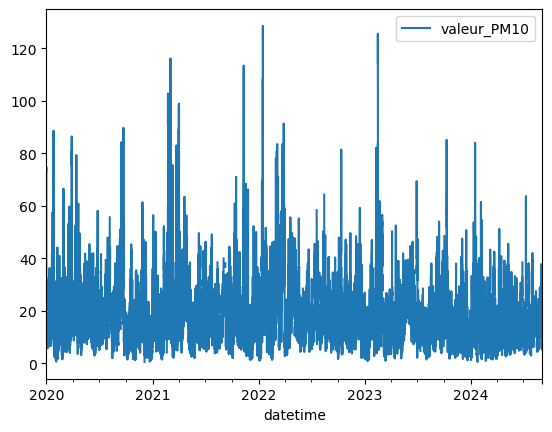

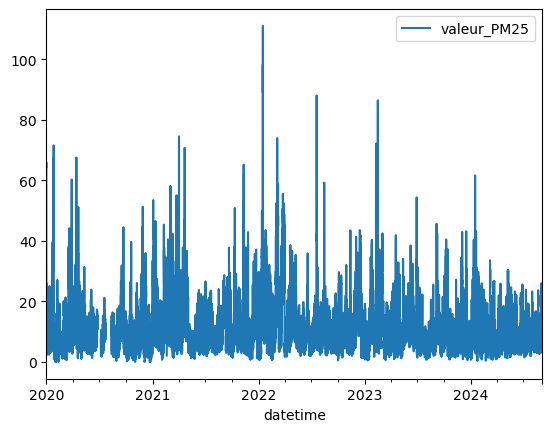

In [3]:
for s in ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']:
    df.plot(x='datetime', y=s)

In [4]:
min_date, max_date = df["datetime"].min(), df["datetime"].max()
print(min_date)
print(max_date)

2020-01-01 00:00:00
2024-09-03 22:00:00


## Covid 19

In [5]:
pd.to_datetime(df["datetime"].dt.date)

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
40986   2024-09-03
40987   2024-09-03
40988   2024-09-03
40989   2024-09-03
40990   2024-09-03
Name: datetime, Length: 40991, dtype: datetime64[ns]

In [6]:
def add_covid_stringency_index(df: pd.DataFrame, path: str) -> pd.DataFrame:
    df = df.copy()
    df['date'] = pd.to_datetime(pd.to_datetime(df["id"], format="%Y-%m-%d %H").dt.date)
    min_date, max_date = df["date"].min(), df["date"].max()

    covid_index = pd.read_csv(path)
    covid_index["date"] = pd.to_datetime(covid_index["Date"], format="%Y%m%d")

    covid_index = (
        covid_index
        .query("CountryName == 'France'")
        .query("date >= @min_date and date <= @max_date")
        [["date", "StringencyIndex_Average"]]
    )

    df = df.merge(covid_index, on="date", how="left").fillna(0).drop(columns='date')
    return df

In [7]:
df_covid = add_covid_stringency_index(df, '../../external_data/Covid_19_Index.csv')
df_covid.head()

/var/folders/b3/l_t9dzy13rz2smp7vyx9352h0000gn/T/ipykernel_84267/294577643.py:6: DtypeWarning: Columns (2,3,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_index = pd.read_csv(path)


,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,datetime,StringencyIndex_Average
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01 00:00:00,0.0
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01 01:00:00,0.0
2,2020-01-01 02,29.3,0.000,5.1,51.0,44.9,2020-01-01 02:00:00,0.0
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01 03:00:00,0.0
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01 04:00:00,0.0


<Axes: xlabel='datetime'>

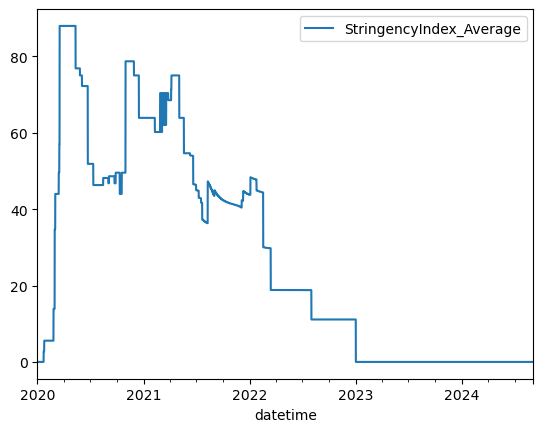

In [8]:
df_covid.plot(x='datetime', y='StringencyIndex_Average')

## Temporal Features

In [9]:
import holidays

def add_date_features(df: pd.DataFrame) -> pd.DataFrame:
    fr_holidays = holidays.France()
    df = df.copy()
    
    df["datetime"] = pd.to_datetime(df["id"], format="%Y-%m-%d %H")
    df["date"] = df["datetime"].dt.date

    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["day_of_week"] = df["datetime"].dt.dayofweek  # Monday=0
    df["hour"] = df["datetime"].dt.hour
    df["is_weekend"] = df["datetime"].dt.dayofweek >= 5
    df["IsHoliday"] = df["datetime"].dt.date.apply(lambda x: x in fr_holidays)

    return df

In [10]:
df_temporal = add_date_features(df)
df_temporal.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,datetime,date,year,month,day,day_of_week,hour,is_weekend,IsHoliday
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,2020-01-01 00:00:00,2020-01-01,2020,1,1,2,0,False,True
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,2020-01-01 01:00:00,2020-01-01,2020,1,1,2,1,False,True
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,2020-01-01 02:00:00,2020-01-01,2020,1,1,2,2,False,True
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,2020-01-01 03:00:00,2020-01-01,2020,1,1,2,3,False,True
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,2020-01-01 04:00:00,2020-01-01,2020,1,1,2,4,False,True
